## Basics of Optimization 

Using a linear function

y = w

In [35]:
import torch
import numpy as np
import imageio
import os
from matplotlib import pyplot as plt
import torch.optim as optim

In [36]:
# Inputs
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]

# Outputs
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

t_c = torch.tensor(  t_c   )
t_u = torch.tensor(  t_u   )

print(t_u)
print(t_c)

# t_u = 0.1 * t_u (for normalizing)

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])
tensor([ 0.5000, 14.0000, 15.0000, 28.0000, 11.0000,  8.0000,  3.0000, -4.0000,
         6.0000, 13.0000, 21.0000])


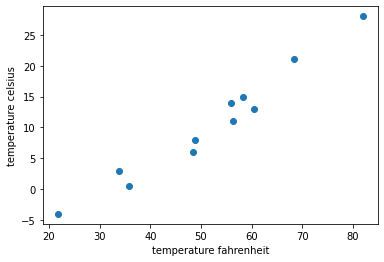

In [37]:
fig = plt.figure()
plt.xlabel("temperature fahrenheit")
plt.ylabel("temperature celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.show()

## Inference Function (Model)

In [38]:
## t_c = w * t_u + b

def model(t_u, w, b):
    return w * t_u + b # w & b are random values, e.g. 4 or -7

## Loss Function (Model)

In [39]:
def loss_fn(y_real, y_pred):
    squared_diffs = (y_real - y_pred)
    return squared_diffs.mean()

In [40]:
#def loss_fn(t_p, t_c):
#    squared_diffs = (t_p - t_c) ** 2
#    return squared_diffs.mean()

## Training Function/ Training Loop

In [44]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(0, n_epochs):
        if params.grad is not None:
            params.grad.zero_()
            
        y_pred = model(t_u, *params)
        loss = loss_fn(y_pred, t_c)
        
        loss.backward()
        
        with torch.no_grad():
            params -= learning_rate * params.grad
        
        if epoch % 500 == 0:
            print('Epoch = %d, Loss = %f' % (epoch, float(loss)))
        
            
    return params

In [48]:
result = training_loop(
        n_epochs = 5000,
        learning_rate= 0.01,
        params = torch.tensor(   [1.0, 0.0], requires_grad=True   ),
        t_u = t_u,
        t_c = t_c
        )
        


Epoch = 0, Loss = 41.299999
Epoch = 500, Loss = -13379.957031
Epoch = 1000, Loss = -26801.298828
Epoch = 1500, Loss = -40222.636719
Epoch = 2000, Loss = -53643.910156
Epoch = 2500, Loss = -67063.656250
Epoch = 3000, Loss = -80483.421875
Epoch = 3500, Loss = -93903.179688
Epoch = 4000, Loss = -107323.218750
Epoch = 4500, Loss = -120746.132812


In [49]:
print(  result  )

tensor([-2588.9683,   -49.9976], requires_grad=True)


In [46]:
print(   dir(optim)   )


['ASGD', 'Adadelta', 'Adagrad', 'Adam', 'AdamW', 'Adamax', 'LBFGS', 'NAdam', 'Optimizer', 'RAdam', 'RMSprop', 'Rprop', 'SGD', 'SparseAdam', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_functional', '_multi_tensor', 'lr_scheduler', 'swa_utils']


In [51]:
my_Temp = model(32, *result)

print(my_Temp)

tensor(-82896.9844, grad_fn=<AddBackward0>)
